In [1]:
import autoencoder.adversarial as aae
import autoencoder.utils as utils 
import autoencoder.cluster_layer as clay

import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline


/home/cjw/anaconda3/envs/deep/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
config = tf.ConfigProto(
        device_count = {'GPU': 0}
    )

esize = [(64,3), (128, 3)] #, (256,3)]
dsize = list(reversed(esize))

params =dict()

params['nclusters'] = 10
params['width'] = 28
params['height'] = 28
params['nchannels'] = 1
params['channels'] = [0]
params['nepochs'] = 20
params['batchsize'] = 256
params['learning_rate'] = 0.0005
params['restore'] = False
params['latent_size'] = 16
params['enc_sizes'] = esize 
params['dec_sizes'] = dsize
params['droprate'] = 0.85
params['stdev'] = 0.04
params['denoise'] = False
params['slam'] = 0

datadir = "/media/cjw/Data/MNIST/"
cpf = "/media/cjw/Data/cyto/Checkpoints/2018-09-12-11-01-37_idec_mnist/"
cpf += "checkpoint-2018-09-12-11-01-37/autoencoder-16x-40000"
cpd = ""

In [3]:
rl = aae.aae_loader(params, datadir, cpf, cpd)

In [4]:
rl.load()


Encoder True
Tensor("Placeholder:0", shape=(?, 28, 28, 1), dtype=float32) (?, 28, 28, 1)
isize:  7 28
dh0 (?, 28, 28, 1)
[<tf.Variable 'encoder/filter_00/kernel:0' shape=(3, 3, 1, 64) dtype=float32_ref>, <tf.Variable 'encoder/filter_00/bias:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'encoder/filter_01/kernel:0' shape=(3, 3, 64, 128) dtype=float32_ref>, <tf.Variable 'encoder/filter_01/bias:0' shape=(128,) dtype=float32_ref>, <tf.Variable 'encoder/latent_space/kernel:0' shape=(6272, 16) dtype=float32_ref>, <tf.Variable 'encoder/latent_space/bias:0' shape=(16,) dtype=float32_ref>, <tf.Variable 'decoder/dense/kernel:0' shape=(16, 6272) dtype=float32_ref>, <tf.Variable 'decoder/dense/bias:0' shape=(6272,) dtype=float32_ref>, <tf.Variable 'decoder/conv2d_transpose/kernel:0' shape=(3, 3, 64, 128) dtype=float32_ref>, <tf.Variable 'decoder/conv2d_transpose/bias:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'decoder/decoder_out/kernel:0' shape=(5, 5, 1, 64) dtype=float32_ref>, <tf.Variabl

(12000, 28, 28, 1)
DBSCAN(algorithm='auto', eps=1.2, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)
N cores 15
original clusters
[11943    11     0     5     0     4     0     9     0     8     0    10
     0     5     5]


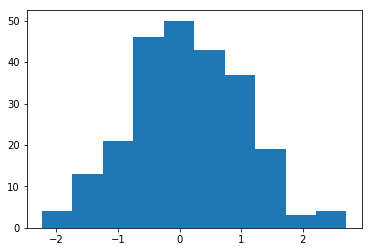

building cluster layer (?, 16)
after input_spec
15 16 <class 'int'> float32
(15, 16)
(15, 16)
done building
CALL  (?, 15) (?, 1, 16)
0 14.035154 10.073875
[ 696  330  837  753 1003 1009  536  117 1008 1518   93 2441  955  158
  546]
1.0
1000 7.803075 7.58375
[   7    6    9   85 4334    5    2  114   71    2   75 6978   73  223
   16]
0.7125
2000 8.025866 7.890026
[   1    1    8   58 3923    5    2   73   36    1   67 7544   47  220
   14]
0.10683333333333334
3000 7.911281 7.7886195
[   2    3    6   53 3815    4    2   73   25    1   62 7727   30  186
   11]
0.09116666666666666
4000 7.367506 7.267561
[   3    2   10   52 3639    5    3   62   20    2   47 7977   24  147
    7]
0.08358333333333333
5000 7.452683 7.3549356
[   1    1    9   53 3436    5    3   53   17    2   50 8195   26  144
    5]
0.0765
6000 7.4569244 7.3677735
[   1    1    8   51 3312    4    2   48   23    1   44 8327   30  138
   10]
0.073
7000 8.392154 8.308299
[   1    7   50 3206    4    3   48    0   21    1 

In [5]:
cluster = clay.cluster_train(rl)

In [5]:
b = utils.get_sample(rl.mmdict, rl.df, 60000, 28, 1, [0])

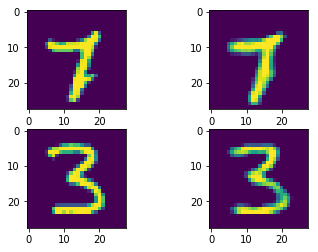

In [6]:
z = rl.encoder.eval({rl.images:b}, session=rl.sess)
dc = rl.decoder.eval({rl.encoder:z}, session=rl.sess)

index = 0
c = 0
dr = np.squeeze(dc[index,:,:,c])
plt.subplot(2,2,1)
plt.imshow(b[index,:,:,c])
plt.subplot(2,2,2)
plt.imshow(dr)

dr = np.squeeze(dc[index + 1,:,:,c])
plt.subplot(2,2,3)
plt.imshow(b[index + 1,:,:,c])
plt.subplot(2,2,4)
plt.imshow(dr)

In [113]:
import numpy as np
res = cluster.eval({rl.images:b}, session = rl.sess)


In [114]:
n19 = (np.argmax(res, axis=1) == 14)
ni = np.where(n19)[0]
print(len(ni))

17


11


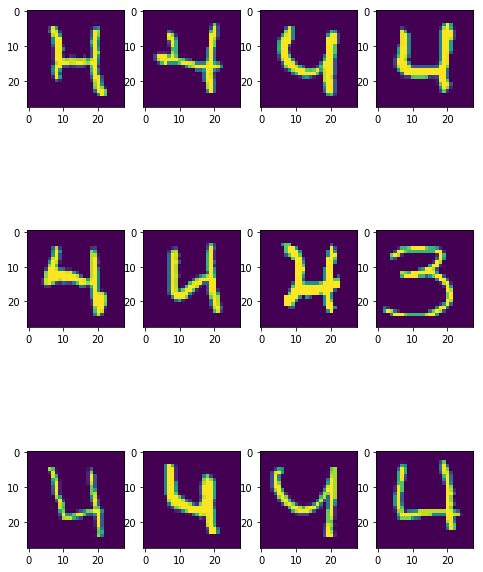

In [115]:
nr = len(ni)
if nr > 12:
    nr = 12
nc = 1
plt.figure(figsize=(8,nr*4))
for ie, i in enumerate(ni):
    #print(i)
    plt.subplot(nr,4,nc)
    nc +=1
    plt.imshow(b[i,:,:,0])
    
    if ie >= 11:
        print(ie)
        break
    
    
    

[    0     0     0     0     0     0     0     0     0     0 31802 28198
     0     0     0     0     0     0     0     0] [-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]


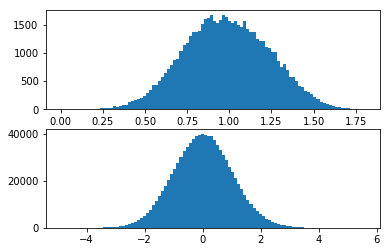

In [174]:
from scipy.spatial.distance import cdist

pz = np.expand_dims(1*z[0],0)

pzdc = rl.decoder.eval({rl.encoder:pz}, session=rl.sess)
pzcd = cdist(z, pz, 'correlation')
zasort = np.argsort(pzcd, axis=0)

plt.subplot(2,1,1)
hz, hzx = np.histogram(pzcd, bins=20,range=(-10,10))
print(hz, hzx)
plt.hist(pzcd, bins=100)
plt.subplot(2,1,2)
_ = plt.hist(np.reshape(z, (-1)), bins=100)

In [122]:
def tdist(x1, x2):
    y = x1 - x2
    y = 1 + np.sum(y*y)
    y = 1./y
    return y
    
    
def ndist(x1, x2):
    y = x1 - x2
    y = np.sum(y*y)
    y =np.exp(-y/2.)
    return y

from scipy.spatial.distance import cdist

zi = 21219
p1 = np.expand_dims(z[zi],0)

pdc = rl.decoder.eval({rl.encoder:p1}, session=rl.sess)
pcd = cdist(z, p1, 'correlation')#'chebyshev')
asort = np.argsort(pcd, axis=0)
tps = asort[0:100,0]
bps = np.flip(asort[-99:,0], 0)
tps[0:11], pcd[bps[-8:]], pcd[tps[0:8]]


(array([21219, 13325, 13470,  4774,   749, 52176,  2891, 57564, 22669,
         6889,     4]), array([[1.66413814],
        [1.66389167],
        [1.66347144],
        [1.66324078],
        [1.6627399 ],
        [1.66250411],
        [1.66100761],
        [1.66065406]]), array([[0.        ],
        [0.11043337],
        [0.11666395],
        [0.11999866],
        [0.12465816],
        [0.13159534],
        [0.13462283],
        [0.13721576]]))

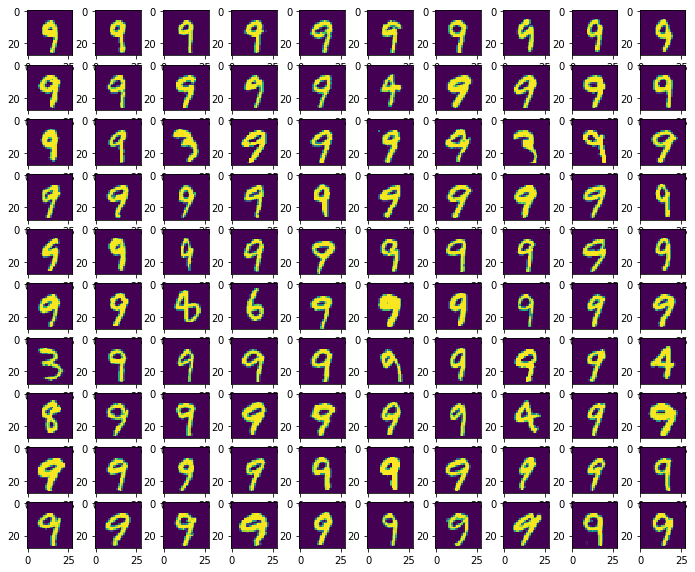

In [123]:
nc = 1
nr = len(tps)//4 + 1
plt.figure(figsize=(12,nr))
plt.subplot(nr,10,nc)
nc +=1
plt.imshow(np.squeeze(b[zi,:,:,0])) #b[zi,:,:,0])
    
for ie, i in enumerate(tps):
    if ie == 0:
        continue
    plt.subplot(nr,10,nc)
    nc +=1
    plt.imshow(b[i,:,:,0])
    

    

(100, 28, 28, 1)


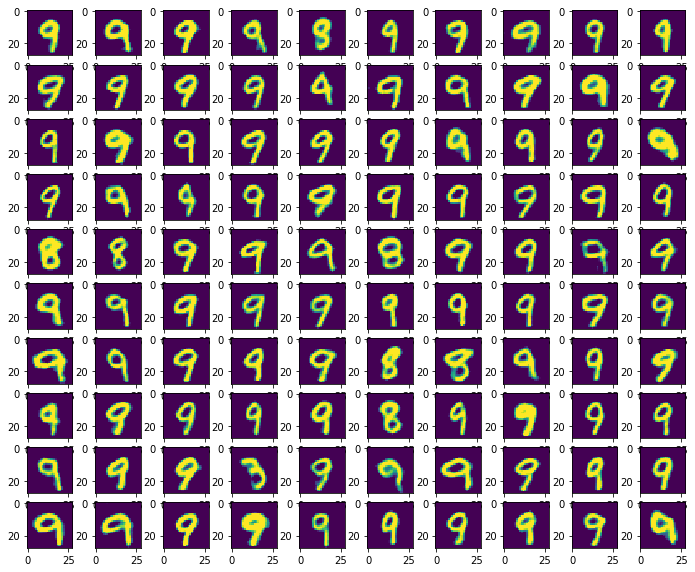

In [115]:
fdc = rl.decoder.eval({rl.encoder:z[tps]}, session=rl.sess)

print(fdc.shape)
plt.figure(figsize=(12,nr))
# plt.subplot(nr,10,nc)
# nc +=1
# plt.imshow(np.squeeze(b[zi,:,:,0])) #b[zi,:,:,0])
nc = 1    
for ie, i in enumerate(tps):
    if ie == -1:
        continue
    plt.subplot(nr,10,nc)
    nc +=1
    plt.imshow(fdc[ie,:,:,0])

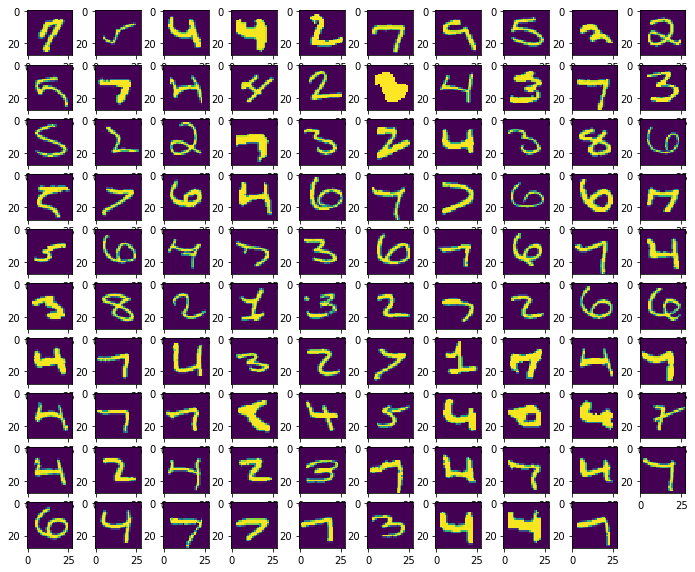

In [48]:
nc = 1
nr = len(tps)//4 + 1
plt.figure(figsize=(12,nr))
plt.subplot(nr,10,nc)
nc +=1
plt.imshow(b[zi,:,:,0])
    
for ie, i in enumerate(bps):
    if ie == 0:
        continue
    plt.subplot(nr,10,nc)
    nc +=1
    plt.imshow(b[i,:,:,0])

In [159]:
from sklearn.manifold import TSNE
zsn = np.random.permutation(np.linspace(0, len(z-1), num=len(z), dtype=np.int32))
zs = z[zsn[0:6000]]
tsne = TSNE(2, 90,learning_rate=50 ,metric='correlation').fit_transform(zs)

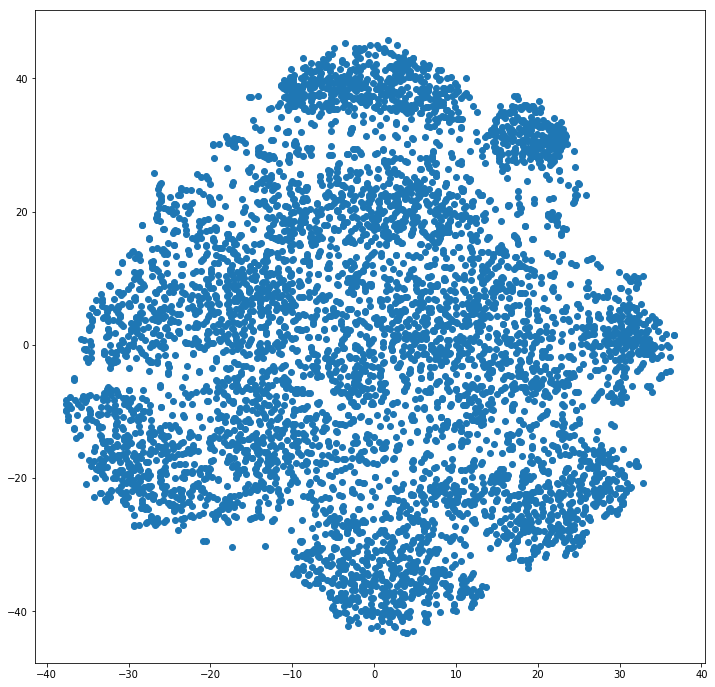

In [160]:
plt.figure(figsize=(12,12))
plt.scatter(tsne[:,0], tsne[:,1])

In [ ]:
np.linalg.norm(np.array([1,2,-3]), ord=2, axis=0)
#qv

In [ ]:
from scipy.spatial.distance import euclidean
wgh = rl.sess.run(cluster.weights)
wgh = wgh[0]

for p in z:
    print(np.linalg.norm(wgh[16] - p, ord=2))


In [ ]:
from scipy.signal import convolve

zi = np.copy(z[index:index+2])
#zi = np.expand_dims(zi, 0)
zi = -zi[0]# + zi[1]
#zi = convolve(zi, np.array([1])/1, mode='same')
#zi[np.abs(zi) < .5] *= 0
rx = np.random.randint(0, 256, 10)
#zi[rx] = 10
#zi = np.sum(zi, axis=0)/2
zi = np.expand_dims(zi, 0)
plt.plot(zi[0])
zi.shape

In [ ]:
di = rl.decoder.eval({rl.encoder:zi}, session=rl.sess)
plt.imshow(np.squeeze(di[0,:,:,0]))